In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


In [2]:
transactions_annual = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions_annual.csv")
rents_annual = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\rents_annual.csv")

In [3]:
rents_annual['Annual Amount'] = rents_annual['Annual Amount'] / rents_annual['Count']  # Normalize by count
rents_annual['Property Size (sq.m)'] = rents_annual['Property Size (sq.m)'] / rents_annual['Count']  # Normalize by count
rents_annual['Contract Amount'] = rents_annual['Contract Amount'] / rents_annual['Count']  # Normalize by count
rents_annual = rents_annual.drop(columns=['Count'])  # Drop the Count column

# Encode categorical variables
rents_annual = pd.get_dummies(rents_annual, columns=['Version', 'Area', 'Property Type', 'Property Sub Type', 'Usage', 'Is Free Hold?'], drop_first=True)

In [4]:
# Split the rents_annual into features (X) and target (y)
X = rents_annual.drop(columns=['Annual Amount', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark'])
y = rents_annual['Annual Amount']


In [5]:
# Scale numerical features
scaler = StandardScaler()
X[['Property Size (sq.m)', 'Contract Amount']] = scaler.fit_transform(X[['Property Size (sq.m)', 'Contract Amount']])

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train a Random Forest Regressor with hyperparameter tuning
model = RandomForestRegressor(random_state=42, verbose=1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best model
rfr_best_model = grid_search.best_estimator_

# Make predictions
y_pred = rfr_best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importance
feature_importances = rfr_best_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

KeyboardInterrupt: 

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rfr_best_model, 'random_forest_regressor_model.pkl')


In [ ]:
# Train a Decision Tree Regressor with Grid Search
tree_model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (Decision Tree): {mae}")
print(f"R-squared (Decision Tree): {r2}")

In [ ]:
# Train an SVR model with Grid Search
svr_model = SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose = 2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (SVR): {mae}")
print(f"R-squared (SVR): {r2}")

In [ ]:
import joblib

# Save the SVR model to a file
joblib.dump(best_model, 'svr_model.pkl')

In [ ]:
# Train an MLP Regressor with Grid Search
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose = 2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MLP): {mae}")
print(f"R-squared (MLP): {r2}")

In [ ]:
joblib.dump(best_model, 'mlp_model.pkl')

# Transactions

In [4]:
transactions_annual["Avg_Price"] = transactions_annual["Amount"] / transactions_annual["Record Count"]
transactions_annual["Avg_Transaction_Size"] = transactions_annual["Transaction Size (sq.m)"] / transactions_annual["Record Count"]
transactions_annual["Avg_Property_Size"] = transactions_annual["Property Size (sq.m)"] / transactions_annual["Record Count"]
transactions_annual["Buyer_Seller_Ratio"] = transactions_annual["No. of Buyer"] / transactions_annual["No. of Seller"]

In [5]:
transactions_annual["Avg_Price_Lag1"] = transactions_annual["Avg_Price"].shift(1)

In [6]:
transactions_annual["Year_Squared"] = transactions_annual["Year"] ** 2

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features: Year, Avg_Transaction_Size, Buyer_Seller_Ratio, Lagged Price
X = transactions_annual[["Year", "Avg_Transaction_Size", "Buyer_Seller_Ratio", "Avg_Price_Lag1"]]
y = transactions_annual["Avg_Price"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(f"R²: {r2_score(y, y_pred):.2f}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Include polynomial features and economic ratios
X = transactions_annual[["Year", "Avg_Transaction_Size", "Buyer_Seller_Ratio", "Year_Squared"]]
y = transactions_annual["Avg_Price"]

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)
y_pred = model.predict(X)
print(f"R²: {r2_score(y, y_pred):.2f}")

R²: 0.92


In [10]:
from prophet import Prophet

# Prepare data for Prophet (yearly frequency)
df_prophet = transactions_annual[["Year", "Avg_Price"]].rename(columns={"Year": "ds", "Avg_Price": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=5, freq="YE")
forecast = model.predict(future)

16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:44 - cmdstanpy - INFO - Chain [1] done processing


# transactions individual

In [113]:
transactions= pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions.csv")


C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\1225134425.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions= pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions.csv")


In [114]:
transactions['Room(s)'].fillna(0, inplace=True)  # Assume NaN = no rooms
transactions['Parking'].fillna(0, inplace=True)  # Assume NaN = no parking

C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\1616268548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Room(s)'].fillna(0, inplace=True)  # Assume NaN = no rooms
C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\1616268548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [115]:
transactions['Nearest Metro'].fillna('Unknown', inplace=True)
transactions['Project'].fillna('Unknown', inplace=True)

C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\218053647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Nearest Metro'].fillna('Unknown', inplace=True)
C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\218053647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [116]:
transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'], errors='coerce')
transactions['Transaction_Year'] = transactions['Transaction Date'].dt.year
transactions['Transaction_Month'] = transactions['Transaction Date'].dt.month

In [117]:
transactions['Price_per_sqm'] = transactions['Amount'] / transactions['Property Size (sq.m)']

In [118]:
transactions = transactions.drop(columns=['Transaction Number', 'Property ID', 'Transaction Date'])

In [119]:
columns_to_have = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ]
columns_to_drop = ['Property Type','Usage','Room(s)','Parking','Project', 'Transaction Type','Is Free Hold?','Transaction sub type','Registration type','Property Sub Type']
transactions = transactions.drop(columns_to_drop, axis = 1)

# location related columns

In [120]:
# columns_to_have = ['Property Type','Is Free Hold?','Registration type']
# columns_to_drop = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall','Transaction Type','Transaction sub type','Usage','Project','Property Sub Type' ]
# transactions = transactions.drop(columns_to_drop, axis = 1)



In [121]:
transactions = pd.get_dummies(transactions, columns=columns_to_have)

In [122]:
columns_to_keep = [
    'Area_Jabal Ali', 'Area_DUBAI WATER FRONT',
    'Nearest Metro_Unknown', 'Nearest Metro_Palm Jumeirah',
    'Area_PALM DEIRA', 'Area_Saih Aldahal', 'Price_per_sqm', 'Area_Al Warsan Second',
    'Area_PALM JUMEIRAH', 'Transaction Size (sq.m)', 'Area_Al Barsha First','Amount', 'Transaction_Year' 
]

transactions = transactions[columns_to_keep]

In [123]:
# # List of columns to keep based on feature importance
# columns_to_keep = [
#     'Is Free Hold?_Free Hold',
#     'Parking',
#     'Property Type_Building',
#     'Price_per_sqm',
#     'Transaction_Year',
#     'Transaction_Month',
#     'Transaction Size (sq.m)',
#     'Property Size (sq.m)',
#     'Property Type_Land',
#     'Amount',
#     'Transaction_Year'
# ]

# # Filter the dataframe to keep only the important columns
# transactions_filtered = transactions[columns_to_keep]
# transactions_filtered.head()

In [124]:
# Sort by date and split
transactions = transactions.sort_values('Transaction_Year')
train = transactions[transactions['Transaction_Year'] < 2022]
test = transactions[transactions['Transaction_Year'] >= 2022]

X_train, y_train = train.drop(columns=['Amount']), train['Amount']
X_test, y_test = test.drop(columns=['Amount']), test['Amount']

In [125]:
import xgboost as xgb
import numpy as np

# Ensure all columns that are supposed to be numeric are converted to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Replace inf values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6
)
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Feature Importance')

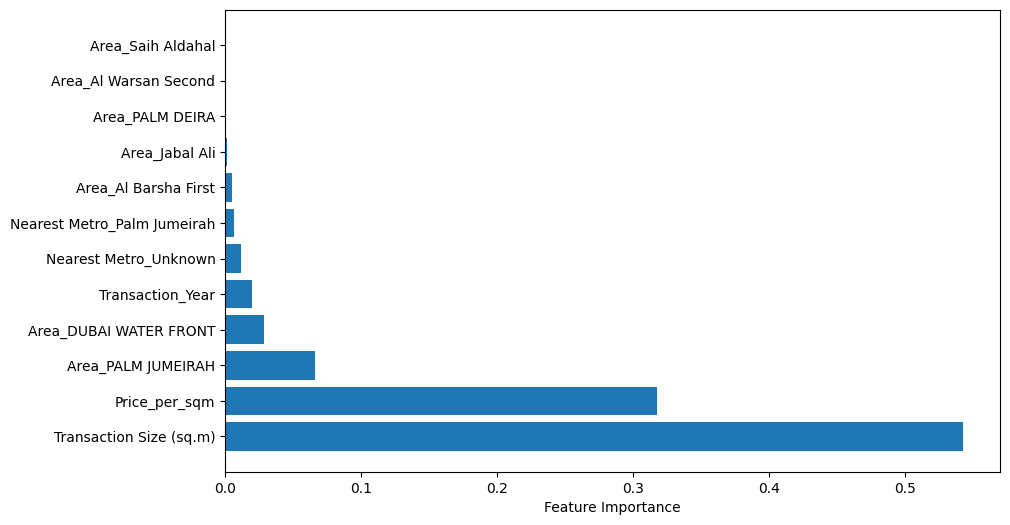

In [126]:
# Get feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')

In [127]:
important_features = importance_df[importance_df['Importance'] > 0.025]
print(important_features)

                   Feature  Importance
9  Transaction Size (sq.m)    0.542401
6            Price_per_sqm    0.317038
8       Area_PALM JUMEIRAH    0.066073
1   Area_DUBAI WATER FRONT    0.028706


In [128]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MAE: 36980.30568207902
R²: 0.9847526419704705


In [129]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

c:\Users\Cody\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 25s 893us/step - loss: 1664458162176.0000
Epoch 2/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 23s 853us/step - loss: 4006731841536.0000
Epoch 3/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 24s 900us/step - loss: 2228289011712.0000
Epoch 4/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 26s 999us/step - loss: 3360518045696.0000
Epoch 5/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 22s 850us/step - loss: 2107660959744.0000
Epoch 6/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 23s 853us/step - loss: 1529960726528.0000
Epoch 7/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 23s 870us/step - loss: 867377807360.0000
Epoch 8/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 23s 869us/step - loss: 1927461076992.0000
Epoch 9/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 24s 890us/step - loss: 5377727922176.0000
Epoch 10/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 25s 927us/step - loss: 5379789422592.0000
Epoch 11/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 24s 913us/step - loss: 1761567440896.0000
Epoch 12/50
26357/26357 ━━━━━━━━━━━━━━━━━━━━ 23s 888u

In [130]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

1341/1341 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step
MAE: 1893892472.3395987
R²: -227640168.6768182


# Rents Individual

In [131]:
rents = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\rents.csv")

In [132]:
rents['Registration Date'] = pd.to_datetime(rents['Registration Date'], errors='coerce')
rents['Transaction Year'] = rents['Registration Date'].dt.year



C:\Users\Cody\AppData\Local\Temp\ipykernel_16892\2094852665.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rents['Registration Date'] = pd.to_datetime(rents['Registration Date'], errors='coerce')


In [133]:
rents['Price_per_sqm'] = rents['Annual Amount'] / rents['Property Size (sq.m)']

In [134]:
rents.drop(columns=['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date', 'Property ID','Contract Amount','Duration (days)', 'No of Units'], inplace=True)

In [135]:
# columns_to_have = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ]
# columns_to_drop = ['Property Type','Usage','Is Free Hold?','Property Sub Type', 'Property Size (sq.m)']
# rents = rents.drop(columns_to_drop, axis = 1)


In [136]:
columns_to_drop = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ,'Property Sub Type', 'Property Size (sq.m)']
columns_to_have = ['Property Type','Usage','Is Free Hold?']
rents = rents.drop(columns_to_drop, axis = 1)


In [137]:
rents = pd.get_dummies(rents, columns=columns_to_have)

In [ ]:
columns_to_keep = [
    'Area_Al Thanayah Fourth', 'Area_Al Barsha First', 'Area_Al Warsan First', 'Area_Wadi Al Safa 6',
    'Nearest Landmark_Burj Al Arab', 'Area_Al Thanyah First', 'Area_Al Mararr', 'Area_Marsa Dubai',
    'Area_Jabal Ali First', 'Area_Jumeirah Third', 'Area_Jumeirah First', 'Area_Al Thanyah Fifth',
    'Area_Muhaisanah Second', 'Area_Al Suq Al Kabeer', 'Area_Mirdif', 'Area_Al Qusais First',
    'Nearest Metro_Buj Khalifa Dubai Mall Metro Station', 'Area_Al Barshaa South Third', 'Area_Palm Jumeirah',
    'Area_Jabal Ali Industrial First', 'Area_Wadi Al Safa 7', 'Area_Al Saffa First', 'Area_Al Thanyah Third',
    'Nearest Metro_Harbour Tower', 'Transaction Year', 'Annual Amount'
]

rents = rents[columns_to_keep]


In [ ]:
columns_to_keep = [
    'Property Type_Villa', 'Property Type_Virtual Unit', 'Usage_Residential', 'Is Free Hold?_Free Hold',
    'Property Type_Land', 'Usage_Industrial', 'Transaction Year', 'Annual Amount'
]

rents = rents[columns_to_keep]


In [ ]:
                       Feature  Importance
6          Property Type_Villa    0.783926
7   Property Type_Virtual Unit    0.048800
14           Usage_Residential    0.046029
18     Is Free Hold?_Free Hold    0.026239
2                Price_per_sqm    0.025160
4           Property Type_Land    0.016712
12            Usage_Industrial    0.012684

In [138]:
# Sort by date and split
rents = rents.sort_values('Transaction Year')
train = rents[rents['Transaction Year'] < 2022]
test = rents[rents['Transaction Year'] >= 2022]

X_train, y_train = train.drop(columns=['Annual Amount']), train['Annual Amount']
X_test, y_test = test.drop(columns=['Annual Amount']), test['Annual Amount']

In [139]:
import xgboost as xgb
import numpy as np

# Ensure all columns that are supposed to be numeric are converted to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Replace inf values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6
)
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Feature Importance')

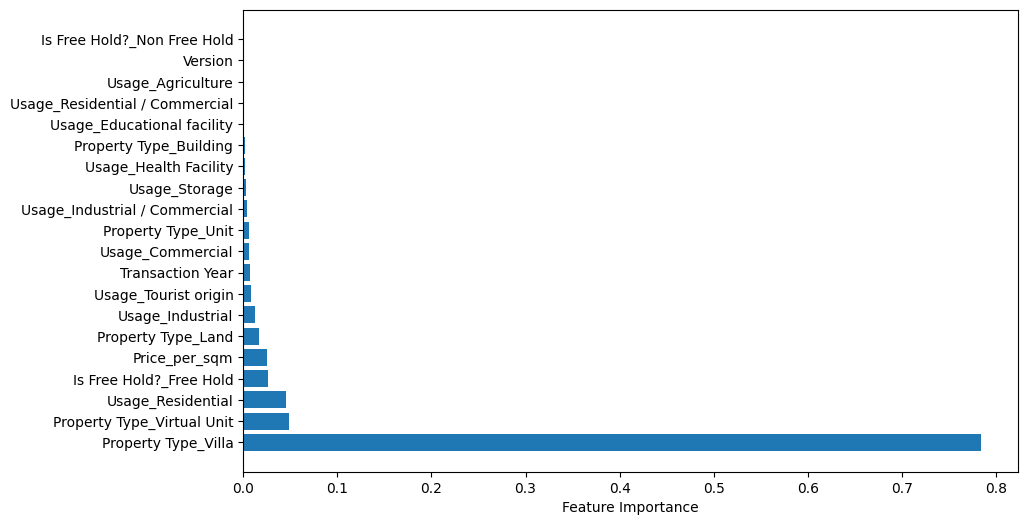

In [140]:
# Get feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')

In [141]:
important_features = importance_df[importance_df['Importance'] > 0.01]
print(important_features)

                       Feature  Importance
6          Property Type_Villa    0.783926
7   Property Type_Virtual Unit    0.048800
14           Usage_Residential    0.046029
18     Is Free Hold?_Free Hold    0.026239
2                Price_per_sqm    0.025160
4           Property Type_Land    0.016712
12            Usage_Industrial    0.012684


In [142]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

# for location
# MAE: 25754.46788843973
# R²: 0.43516170318879177

# for property type
# MAE: 29392.70903144375
# R²: 0.33741318412919574

MAE: 29392.70903144375
R²: 0.33741318412919574
